In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as PLT
import seaborn as SB
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
DF = pd.read_csv('../../datasets/BTC-USD.csv',usecols=['Date','Adj Close']).rename(columns={'Date':'date','Adj Close':'price'})

In [3]:
DF['date'] = pd.to_datetime(DF['date'])

In [4]:
GRPS = DF.resample(rule='W', on='date')['price'].mean()
DFM = pd.concat([pd.Series(GRPS.keys()),pd.Series(GRPS.values,name='price')],axis=1)

GRPS = DF.resample(rule='Y', on='date')['price'].mean()
DFY = pd.concat([pd.Series(GRPS.keys()),pd.Series(GRPS.values,name='price')],axis=1)

# sarimax (data must be Stationarity)

### Stationarity: 
#### A stationary time series is one whose properties do not depend on the time at which the series is observed


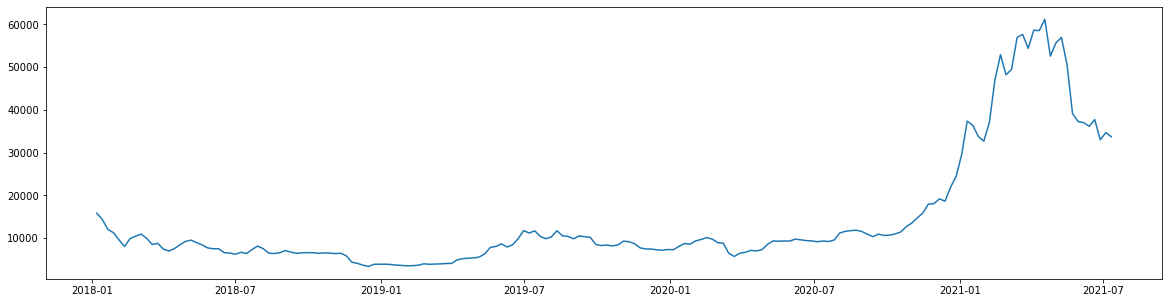

In [5]:
PLT.figure(figsize=(20,5))
PLT.plot(DFM['date'],DFM['price'])
# PLT.plot(DFY['date'],DFY['price'])

In [ ]:
# AdFuller = adfuller(DFM['price'])[1]
# isStationarity = AdFuller < .05

# if isStationarity:
#     DFM['price'] = np.log(DFM['price'])
# AdFuller

In [ ]:
# PLT.figure(figsize=(20,5))
# PLT.plot(DFM['date'],DFM['price'])

In [ ]:
# for i in range(0,6):
#     DFM['price'] = DFM['price'].diff() #differentiate
#     DFM.dropna(inplace=True)

In [ ]:
# AdFuller = adfuller(DFM['price'])[1]
# AdFuller

In [ ]:
# PLT.figure(figsize=(20,5))
# PLT.plot(DFM['date'],DFM['price'])

In [38]:
AR = 10 # count of look past data
I = 1 # diff
MA = 10 # count of look past noise data
# model = SARIMAX(DFM['price'],order=(AR,I,MA)) #,seasonal_order=(3,1,3,  4)
model = SARIMAX(DFM['price'],order=(9, 5, 8)) #,seasonal_order=(3,1,3,  4)
result = model.fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.49181D+00    |proj g|=  1.29886D+00

At iterate    5    f=  9.05190D+00    |proj g|=  1.75552D-01

At iterate   10    f=  8.97253D+00    |proj g|=  1.38099D-01

At iterate   15    f=  8.94153D+00    |proj g|=  8.23761D-02

At iterate   20    f=  8.90832D+00    |proj g|=  4.63639D-02

At iterate   25    f=  8.87266D+00    |proj g|=  7.68545D-02

At iterate   30    f=  8.85327D+00    |proj g|=  8.12360D-02

At iterate   35    f=  8.84937D+00    |proj g|=  6.78623D-02

At iterate   40    f=  8.84805D+00    |proj g|=  1.41718D-02

At iterate   45    f=  8.84615D+00    |proj g|=  1.40273D-02

At iterate   50    f=  8.84499D+00    |proj g|=  1.08772D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                  184
Model:               SARIMAX(9, 5, 8)   Log Likelihood               -1627.479
Date:                Wed, 16 Nov 2022   AIC                           3290.958
Time:                        15:04:42   BIC                           3348.331
Sample:                             0   HQIC                          3314.222
                                - 184                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.6890      0.423     -6.359      0.000      -3.518      -1.860
ar.L2         -4.1778      0.837     -4.993      0.000      -5.818      -2.538
ar.L3         -5.1282      1.164     -4.404      0.000      -7.410      -2.846
ar.L4         -5.4018      1.321     -4.089      0.000      -7.991      -2.813
ar.L5         -4.7432      1.288     -3.682      0.000      -7.268      -2.219
ar.L6         -3.6182      0.977     -3.702      0.000      -5.534      -1.703
ar.L7         -2.4687      0.678     -3.641      0.000      -3.798      -1.140
ar.L8         -1.3428      0.398     -3.377      0.001      -2.122      -0.563
ar.L9         -0.4043      0.162     -2.501      0.012      -0.721      -0.087
ma.L1         -0.6481      0.444     -1.460      0.144      -1.518       0.222
ma.L2         -1.0206      0.622     -1.640      0.101      -2.240       0.199
ma.L3          0.0855      0.333      0.257      0.798      -0.568       0.739
ma.L4          0.5802      0.288      2.012      0.044       0.015       1.145
ma.L5         -0.2275      0.342     -0.664      0.506      -0.899       0.444
ma.L6          0.5679      0.429      1.323      0.186      -0.273       1.409
ma.L7          0.0704      0.533      0.132      0.895      -0.973       1.114
ma.L8         -0.3930      0.351     -1.120      0.263      -1.081       0.295
sigma2      5.708e+06   1.34e-06   4.27e+12      0.000    5.71e+06    5.71e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                94.78
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               6.01   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.97e+29. Standard errors may be unstable.
"""

In [40]:
DFM['sarimax'] = result.fittedvalues

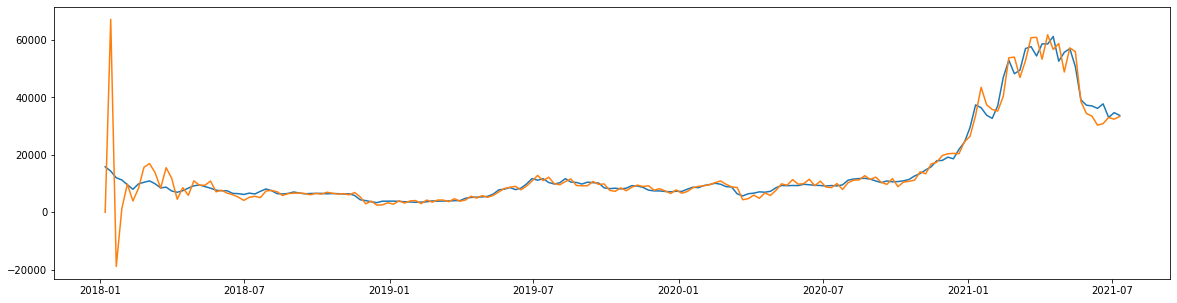

In [41]:
PLT.figure(figsize=(20,5))
PLT.plot(DFM['date'],DFM['price'])
PLT.plot(DFM['date'],DFM['sarimax'])

In [42]:
predicted = result.predict(start=len(DFM),end=len(DFM)+5)
predicted = DFM['sarimax'].append(predicted)

/tmp/ipykernel_9896/2076923715.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = DFM['sarimax'].append(predicted)


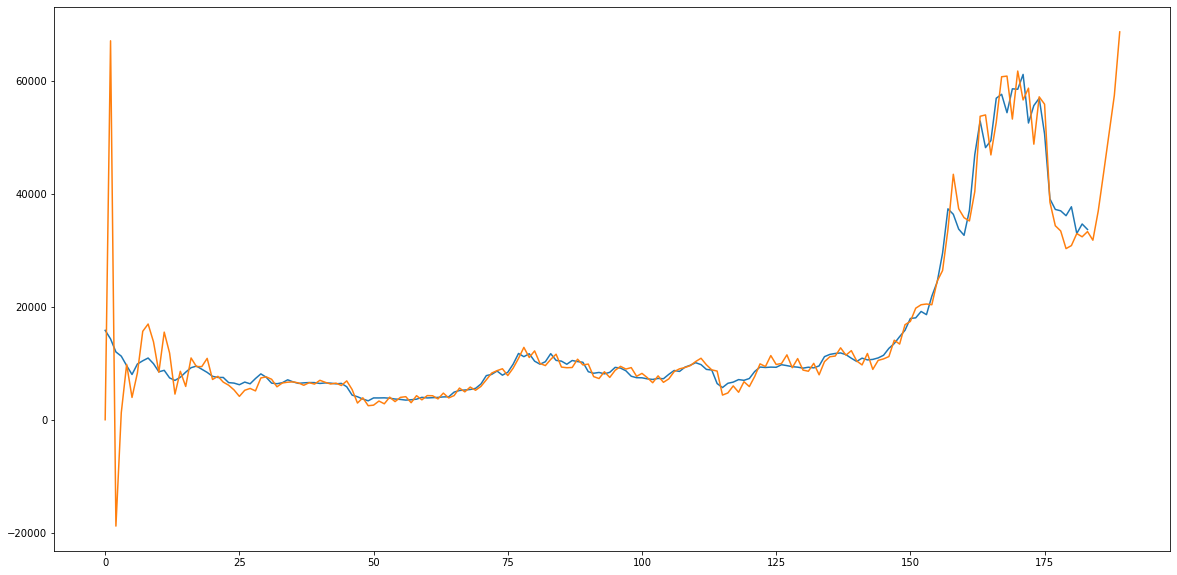

In [43]:
PLT.figure(figsize=(20,10))
PLT.plot(DFM['price'])
PLT.plot(predicted)

In [35]:
# custom grid search
from itertools import product
p = range(4,10,1)
d = [5]
q = range(4,10,1)
params = list(product(p,d,q))
len(list(params))

36

In [36]:
aies = []
for i,order in enumerate(params):
    print(f'****************************************{i}********************************************')
    print(f'****************************************{i}********************************************')
    print(f'****************************************{i}********************************************')
    print(f'****************************************{i}********************************************')

    try:
        model = SARIMAX(DF['price'],order=order)
        response = model.fit()
        aies.append((response.aic,order))
    except:
        continue
    

****************************************0********************************************
****************************************0********************************************
****************************************0********************************************
****************************************0********************************************
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.71920D+00    |proj g|=  1.42500D-01


 This problem is unconstrained.



At iterate    5    f=  8.62541D+00    |proj g|=  2.24595D-02

At iterate   10    f=  8.57635D+00    |proj g|=  3.65630D-02

At iterate   15    f=  8.51080D+00    |proj g|=  1.49063D-02

At iterate   20    f=  8.50358D+00    |proj g|=  8.04671D-03

At iterate   25    f=  8.50114D+00    |proj g|=  3.09668D-03

At iterate   30    f=  8.50089D+00    |proj g|=  2.05818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     33     58      1     0     0   1.109D-03   8.501D+00
  F =   8.5008778491672139     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
****************************************1**********

 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.70160D+00    |proj g|=  1.20326D-01

At iterate    5    f=  8.56576D+00    |proj g|=  9.76976D-02

At iterate   10    f=  8.50222D+00    |proj g|=  1.85771D-02

At iterate   15    f=  8.50099D+00    |proj g|=  2.25397D-03

At iterate   20    f=  8.49965D+00    |proj g|=  6.29837D-03

At iterate   25    f=  8.49928D+00    |proj g|=  1.38547D-03

At iterate   30    f=  8.49899D+00    |proj g|=  2.35596D-03

At iterate   35    f=  8.49832D+00    |proj g|=  1.68560D-03

At iterate   40    f=  8.49815D+00    |proj g|=  4.92196D-03

At iterate   45    f=  8.49785D+00    |proj g|=  1.21038D-03


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.49773D+00    |proj g|=  1.60691D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     74      1     0     0   1.607D-03   8.498D+00
  F =   8.4977275636991791     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************2********************************************
****************************************2********************************************
****************************************2********************************************
****************************************2********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69645D+00    |proj g|=  1.14489D-01

At iterate    5    f=  8.60483D+00    |proj g|=  2.68309D-01

At iterate   10    f=  8.54798D+00    |proj g|=  2.69671D-02

At iterate   15    f=  8.51989D+00    |proj g|=  1.81893D-02

At iterate   20    f=  8.51117D+00    |proj g|=  2.97621D-02

At iterate   25    f=  8.50727D+00    |proj g|=  2.80259D-02

At iterate   30    f=  8.50666D+00    |proj g|=  4.96534D-03

At iterate   35    f=  8.50654D+00    |proj g|=  5.91743D-02

At iterate   40    f=  8.50579D+00    |proj g|=  1.87108D-02

At iterate   45    f=  8.50566D+00    |proj g|=  4.86780D-03

At iterate   50    f=  8.50561D+00    |proj g|=  1.58994D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


****************************************3********************************************
****************************************3********************************************
****************************************3********************************************
****************************************3********************************************
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.72636D+00    |proj g|=  1.95484D-01


 This problem is unconstrained.



At iterate    5    f=  8.60952D+00    |proj g|=  2.18700D-01

At iterate   10    f=  8.57424D+00    |proj g|=  1.49605D-01

At iterate   15    f=  8.56884D+00    |proj g|=  3.12415D-02

At iterate   20    f=  8.55369D+00    |proj g|=  5.52199D-02

At iterate   25    f=  8.54386D+00    |proj g|=  3.05734D-02

At iterate   30    f=  8.53061D+00    |proj g|=  7.98208D-02

At iterate   35    f=  8.51312D+00    |proj g|=  8.44676D-02

At iterate   40    f=  8.49992D+00    |proj g|=  2.78562D-01

At iterate   45    f=  8.46614D+00    |proj g|=  1.67247D-01


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.45521D+00    |proj g|=  4.11305D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     67      1     0     0   4.113D-03   8.455D+00
  F =   8.4552064951046937     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************4********************************************
****************************************4********************************************
****************************************4********************************************
****************************************4********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69155D+00    |proj g|=  1.35848D-01

At iterate    5    f=  8.61709D+00    |proj g|=  1.39963D-01

At iterate   10    f=  8.53846D+00    |proj g|=  2.91195D-01

At iterate   15    f=  8.49432D+00    |proj g|=  6.12025D-01

At iterate   20    f=  8.47707D+00    |proj g|=  1.30599D-01

At iterate   25    f=  8.47031D+00    |proj g|=  2.93889D-02

At iterate   30    f=  8.45857D+00    |proj g|=  5.13875D-02

At iterate   35    f=  8.45203D+00    |proj g|=  6.54437D-02

At iterate   40    f=  8.45091D+00    |proj g|=  2.69924D-02

At iterate   45    f=  8.45016D+00    |proj g|=  2.77709D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.45009D+00    |proj g|=  1.33239D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     76      1     0     0   1.332D-02   8.450D+00
  F =   8.4500868286807336     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************5********************************************
****************************************5********************************************
****************************************5********************************************
****************************************5********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68473D+00    |proj g|=  1.06281D-01

At iterate    5    f=  8.59469D+00    |proj g|=  1.82612D-01

At iterate   10    f=  8.52013D+00    |proj g|=  1.93518D-01

At iterate   15    f=  8.49892D+00    |proj g|=  3.75860D-01

At iterate   20    f=  8.48289D+00    |proj g|=  1.20436D-01

At iterate   25    f=  8.47898D+00    |proj g|=  1.84618D-01

At iterate   30    f=  8.47567D+00    |proj g|=  8.12949D-02

At iterate   35    f=  8.47020D+00    |proj g|=  3.07004D-01

At iterate   40    f=  8.46817D+00    |proj g|=  1.78923D-02

At iterate   45    f=  8.46034D+00    |proj g|=  5.28147D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.45764D+00    |proj g|=  2.76796D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     67      1     0     0   2.768D-02   8.458D+00
  F =   8.4576412270096064     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************6********************************************
****************************************6********************************************
****************************************6********************************************
****************************************6********************************************
RUNNING THE L-BFG

 This problem is unconstrained.



At iterate    5    f=  8.61452D+00    |proj g|=  2.97354D-02

At iterate   10    f=  8.59628D+00    |proj g|=  1.63602D-02

At iterate   15    f=  8.59041D+00    |proj g|=  3.13520D-02

At iterate   20    f=  8.58534D+00    |proj g|=  2.08384D-02

At iterate   25    f=  8.58257D+00    |proj g|=  1.58375D-02

At iterate   30    f=  8.58002D+00    |proj g|=  3.06164D-02

At iterate   35    f=  8.57753D+00    |proj g|=  4.39383D-03

At iterate   40    f=  8.57736D+00    |proj g|=  3.78981D-04

At iterate   45    f=  8.57715D+00    |proj g|=  4.48323D-03


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.57678D+00    |proj g|=  2.57389D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     64      1     0     0   2.574D-03   8.577D+00
  F =   8.5767753646285811     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************7********************************************
****************************************7********************************************
****************************************7********************************************
****************************************7********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.70298D+00    |proj g|=  1.28792D-01

At iterate    5    f=  8.59678D+00    |proj g|=  1.00831D-01

At iterate   10    f=  8.51940D+00    |proj g|=  5.67435D-02

At iterate   15    f=  8.49635D+00    |proj g|=  3.44667D-02

At iterate   20    f=  8.48846D+00    |proj g|=  7.63477D-03

At iterate   25    f=  8.48792D+00    |proj g|=  2.27623D-03

At iterate   30    f=  8.48766D+00    |proj g|=  9.62759D-03

At iterate   35    f=  8.48699D+00    |proj g|=  1.85643D-02

At iterate   40    f=  8.48695D+00    |proj g|=  1.00777D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


****************************************8********************************************
****************************************8********************************************
****************************************8********************************************
****************************************8********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69574D+00    |proj g|=  1.12046D-01

At iterate    5    f=  8.58665D+00    |proj g|=  1.28069D-01

At iterate   10    f=  8.52433D+00    |proj g|=  2.88773D-02

At iterate   15    f=  8.49474D+00    |proj g|=  1.15195D-01

At iterate   20    f=  8.48669D+00    |proj g|=  1.50222D-02

At iterate   25    f=  8.48611D+00    |proj g|=  1.11240D-03

At iterate   30    f=  8.48598D+00    |proj g|=  7.40071D-03

At iterate   35    f=  8.48593D+00    |proj g|=  1.40926D-03

At iterate   40    f=  8.48591D+00    |proj g|=  1.10731D-03

At iterate   45    f=  8.48587D+00    |proj g|=  4.84740D-04

At iterate   50    f=  8.48586D+00    |proj g|=  7.87003D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


****************************************9********************************************
****************************************9********************************************
****************************************9********************************************
****************************************9********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.70860D+00    |proj g|=  1.43496D-01

At iterate    5    f=  8.58006D+00    |proj g|=  5.43987D-02

At iterate   10    f=  8.53768D+00    |proj g|=  4.55499D-02

At iterate   15    f=  8.51093D+00    |proj g|=  3.82371D-02

At iterate   20    f=  8.50278D+00    |proj g|=  2.37714D-02

At iterate   25    f=  8.49848D+00    |proj g|=  1.09428D-01

At iterate   30    f=  8.49739D+00    |proj g|=  8.14009D-03

At iterate   35    f=  8.49615D+00    |proj g|=  8.10484D-02

At iterate   40    f=  8.49572D+00    |proj g|=  1.86885D-02

At iterate   45    f=  8.49566D+00    |proj g|=  1.99695D-03

At iterate   50    f=  8.49560D+00    |proj g|=  2.60165D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


****************************************10********************************************
****************************************10********************************************
****************************************10********************************************
****************************************10********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68990D+00    |proj g|=  1.44357D-01

At iterate    5    f=  8.58255D+00    |proj g|=  1.79109D-01

At iterate   10    f=  8.53430D+00    |proj g|=  2.54558D-01

At iterate   15    f=  8.52577D+00    |proj g|=  4.37768D-02

At iterate   20    f=  8.51670D+00    |proj g|=  2.26775D-01

At iterate   25    f=  8.50641D+00    |proj g|=  1.59243D-01

At iterate   30    f=  8.47677D+00    |proj g|=  1.17769D-01

At iterate   35    f=  8.47041D+00    |proj g|=  5.93887D-02

At iterate   40    f=  8.46171D+00    |proj g|=  1.51447D-01

At iterate   45    f=  8.45711D+00    |proj g|=  2.54796D-01


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.45235D+00    |proj g|=  5.31420D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     68      1     0     0   5.314D-02   8.452D+00
  F =   8.4523453290124433     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************11********************************************
****************************************11********************************************
****************************************11********************************************
****************************************11********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68681D+00    |proj g|=  1.17065D-01

At iterate    5    f=  8.57031D+00    |proj g|=  1.42105D-01

At iterate   10    f=  8.50589D+00    |proj g|=  1.08585D-01

At iterate   15    f=  8.47309D+00    |proj g|=  1.00159D-01

At iterate   20    f=  8.46791D+00    |proj g|=  9.72108D-02

At iterate   25    f=  8.46717D+00    |proj g|=  5.47279D-02

At iterate   30    f=  8.46291D+00    |proj g|=  1.10864D-01

At iterate   35    f=  8.46119D+00    |proj g|=  8.76523D-02

At iterate   40    f=  8.45860D+00    |proj g|=  1.06763D-01

At iterate   45    f=  8.45618D+00    |proj g|=  1.77668D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.45442D+00    |proj g|=  3.51284D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     85      1     0     0   3.513D-01   8.454D+00
  F =   8.4544170031753083     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************12********************************************
****************************************12********************************************
****************************************12********************************************
****************************************12********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69217D+00    |proj g|=  1.70496D-01

At iterate    5    f=  8.56574D+00    |proj g|=  4.42487D-02

At iterate   10    f=  8.55477D+00    |proj g|=  1.36108D-02

At iterate   15    f=  8.50496D+00    |proj g|=  7.17796D-02

At iterate   20    f=  8.47072D+00    |proj g|=  1.21273D-02

At iterate   25    f=  8.46644D+00    |proj g|=  3.35715D-03

At iterate   30    f=  8.46487D+00    |proj g|=  1.65751D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


****************************************13********************************************
****************************************13********************************************
****************************************13********************************************
****************************************13********************************************
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69058D+00    |proj g|=  1.50201D-01


 This problem is unconstrained.



At iterate    5    f=  8.60203D+00    |proj g|=  2.59222D-01

At iterate   10    f=  8.57148D+00    |proj g|=  1.90938D-02

At iterate   15    f=  8.56507D+00    |proj g|=  2.37281D-02

At iterate   20    f=  8.56335D+00    |proj g|=  3.79963D-02

At iterate   25    f=  8.56319D+00    |proj g|=  3.83113D-03

At iterate   30    f=  8.56313D+00    |proj g|=  8.62135D-03

At iterate   35    f=  8.56311D+00    |proj g|=  1.26740D-02

At iterate   40    f=  8.56286D+00    |proj g|=  2.99727D-02

At iterate   45    f=  8.56272D+00    |proj g|=  3.95044D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.56260D+00    |proj g|=  2.12081D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     59      1     0     0   2.121D-02   8.563D+00
  F =   8.5625991959301082     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************14********************************************
****************************************14********************************************
****************************************14********************************************
****************************************14********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68637D+00    |proj g|=  1.37466D-01

At iterate    5    f=  8.59707D+00    |proj g|=  6.64976D-02

At iterate   10    f=  8.54881D+00    |proj g|=  8.24436D-02

At iterate   15    f=  8.50775D+00    |proj g|=  1.49919D-01

At iterate   20    f=  8.49304D+00    |proj g|=  1.51482D-01

At iterate   25    f=  8.47368D+00    |proj g|=  4.64808D-02

At iterate   30    f=  8.46974D+00    |proj g|=  6.24320D-02

At iterate   35    f=  8.46842D+00    |proj g|=  2.49197D-02

At iterate   40    f=  8.46816D+00    |proj g|=  3.46451D-03

At iterate   45    f=  8.46671D+00    |proj g|=  2.24273D-02

At iterate   50    f=  8.46666D+00    |proj g|=  3.19463D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


****************************************15********************************************
****************************************15********************************************
****************************************15********************************************
****************************************15********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69213D+00    |proj g|=  1.38557D-01

At iterate    5    f=  8.58167D+00    |proj g|=  6.69913D-02

At iterate   10    f=  8.49834D+00    |proj g|=  2.71379D-01

At iterate   15    f=  8.48331D+00    |proj g|=  8.46674D-02

At iterate   20    f=  8.47411D+00    |proj g|=  5.72786D-02

At iterate   25    f=  8.47210D+00    |proj g|=  6.24279D-02

At iterate   30    f=  8.47057D+00    |proj g|=  1.53841D-02

At iterate   35    f=  8.46980D+00    |proj g|=  5.82672D-02

At iterate   40    f=  8.46973D+00    |proj g|=  1.69251D-03

At iterate   45    f=  8.46952D+00    |proj g|=  1.31916D-01


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.46896D+00    |proj g|=  8.17612D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     64      1     0     0   8.176D-02   8.469D+00
  F =   8.4689566039439388     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************16********************************************
****************************************16********************************************
****************************************16********************************************
****************************************16********************************************
RUNNING THE L

 This problem is unconstrained.



At iterate    5    f=  8.55461D+00    |proj g|=  1.51560D-01

At iterate   10    f=  8.49705D+00    |proj g|=  1.16066D-01

At iterate   15    f=  8.49262D+00    |proj g|=  5.90043D-02

At iterate   20    f=  8.49031D+00    |proj g|=  1.52422D-01

At iterate   25    f=  8.48472D+00    |proj g|=  2.34576D-01

At iterate   30    f=  8.48372D+00    |proj g|=  2.06921D-01

At iterate   35    f=  8.48303D+00    |proj g|=  4.97422D-02

At iterate   40    f=  8.48289D+00    |proj g|=  3.38596D-02

At iterate   45    f=  8.48259D+00    |proj g|=  3.49159D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.48229D+00    |proj g|=  4.93945D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     65      1     0     0   4.939D-02   8.482D+00
  F =   8.4822940707882228     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************17********************************************
****************************************17********************************************
****************************************17********************************************
****************************************17********************************************
RUNNING THE L

 This problem is unconstrained.



At iterate    5    f=  8.54549D+00    |proj g|=  1.20513D-01

At iterate   10    f=  8.51635D+00    |proj g|=  4.20401D-02

At iterate   15    f=  8.50406D+00    |proj g|=  5.22518D-02

At iterate   20    f=  8.48161D+00    |proj g|=  3.14465D-01

At iterate   25    f=  8.46326D+00    |proj g|=  2.18317D-01

At iterate   30    f=  8.46205D+00    |proj g|=  1.34234D-02

At iterate   35    f=  8.46090D+00    |proj g|=  1.07695D-01

At iterate   40    f=  8.46029D+00    |proj g|=  1.02088D-01

At iterate   45    f=  8.45890D+00    |proj g|=  2.68123D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.45493D+00    |proj g|=  4.53194D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     68      1     0     0   4.532D-01   8.455D+00
  F =   8.4549261450845830     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************18********************************************
****************************************18********************************************
****************************************18********************************************
****************************************18********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68141D+00    |proj g|=  1.36971D-01

At iterate    5    f=  8.60325D+00    |proj g|=  8.19794D-02

At iterate   10    f=  8.52374D+00    |proj g|=  4.91699D-02

At iterate   15    f=  8.50588D+00    |proj g|=  2.97420D-02

At iterate   20    f=  8.50347D+00    |proj g|=  3.49960D-03

At iterate   25    f=  8.50165D+00    |proj g|=  2.33102D-03

At iterate   30    f=  8.50155D+00    |proj g|=  3.43009D-03

At iterate   35    f=  8.50075D+00    |proj g|=  9.37909D-03

At iterate   40    f=  8.50016D+00    |proj g|=  4.38893D-03

At iterate   45    f=  8.49919D+00    |proj g|=  1.21340D-03

At iterate   50    f=  8.49918D+00    |proj g|=  5.33377D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


****************************************19********************************************
****************************************19********************************************
****************************************19********************************************
****************************************19********************************************
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68460D+00    |proj g|=  1.35162D-01


 This problem is unconstrained.



At iterate    5    f=  8.58306D+00    |proj g|=  3.54652D-01

At iterate   10    f=  8.53108D+00    |proj g|=  6.38905D-02

At iterate   15    f=  8.52313D+00    |proj g|=  4.18856D-02

At iterate   20    f=  8.51876D+00    |proj g|=  6.22081D-02

At iterate   25    f=  8.51850D+00    |proj g|=  1.55339D-03

At iterate   30    f=  8.51827D+00    |proj g|=  1.82084D-02

At iterate   35    f=  8.51708D+00    |proj g|=  7.53631D-03

At iterate   40    f=  8.51688D+00    |proj g|=  4.72793D-03

At iterate   45    f=  8.51678D+00    |proj g|=  5.44946D-03


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.51534D+00    |proj g|=  5.30973D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     55      1     0     0   5.310D-02   8.515D+00
  F =   8.5153377987138708     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************20********************************************
****************************************20********************************************
****************************************20********************************************
****************************************20********************************************
RUNNING THE L

 This problem is unconstrained.



At iterate    5    f=  8.58103D+00    |proj g|=  6.04635D-02

At iterate   10    f=  8.54696D+00    |proj g|=  5.23336D-02

At iterate   15    f=  8.54456D+00    |proj g|=  1.01939D-02

At iterate   20    f=  8.54160D+00    |proj g|=  8.49748D-03

At iterate   25    f=  8.53691D+00    |proj g|=  5.41144D-02

At iterate   30    f=  8.52644D+00    |proj g|=  1.17285D-01
  ys=-2.941E-02  -gs= 7.366E-03 BFGS update SKIPPED

At iterate   35    f=  8.50096D+00    |proj g|=  8.66587D-01

At iterate   40    f=  8.48145D+00    |proj g|=  2.21064D-01

At iterate   45    f=  8.47940D+00    |proj g|=  1.28611D-01


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.47125D+00    |proj g|=  2.12801D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     77      1     1     0   2.128D-01   8.471D+00
  F =   8.4712500969540905     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************21********************************************
****************************************21********************************************
****************************************21********************************************
****************************************21********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69170D+00    |proj g|=  1.67745D-01

At iterate    5    f=  8.56629D+00    |proj g|=  6.23215D-02

At iterate   10    f=  8.49275D+00    |proj g|=  2.02903D-01

At iterate   15    f=  8.46719D+00    |proj g|=  1.53355D-01

At iterate   20    f=  8.46302D+00    |proj g|=  3.22783D-02

At iterate   25    f=  8.46029D+00    |proj g|=  2.80796D-02

At iterate   30    f=  8.45552D+00    |proj g|=  1.32269D-01

At iterate   35    f=  8.45431D+00    |proj g|=  4.35082D-02

At iterate   40    f=  8.45334D+00    |proj g|=  1.56424D-02

At iterate   45    f=  8.45196D+00    |proj g|=  1.61595D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.45151D+00    |proj g|=  9.26278D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     61      1     0     0   9.263D-02   8.452D+00
  F =   8.4515061030462384     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************22********************************************
****************************************22********************************************
****************************************22********************************************
****************************************22********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68213D+00    |proj g|=  2.33598D-01

At iterate    5    f=  8.58361D+00    |proj g|=  1.43951D-01

At iterate   10    f=  8.50091D+00    |proj g|=  1.95656D-01

At iterate   15    f=  8.46477D+00    |proj g|=  1.68945D-01

At iterate   20    f=  8.45621D+00    |proj g|=  4.73483D-02

At iterate   25    f=  8.45382D+00    |proj g|=  2.65279D-02

At iterate   30    f=  8.45285D+00    |proj g|=  4.46562D-02

At iterate   35    f=  8.45241D+00    |proj g|=  7.65799D-03

At iterate   40    f=  8.45223D+00    |proj g|=  5.22533D-02

At iterate   45    f=  8.45185D+00    |proj g|=  2.51252D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.45133D+00    |proj g|=  1.64096D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     61      1     0     0   1.641D-02   8.451D+00
  F =   8.4513256492420314     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************23********************************************
****************************************23********************************************
****************************************23********************************************
****************************************23********************************************
RUNNING THE L

 This problem is unconstrained.



At iterate    5    f=  8.55750D+00    |proj g|=  1.16828D-01

At iterate   10    f=  8.49468D+00    |proj g|=  7.84616D-02

At iterate   15    f=  8.48362D+00    |proj g|=  6.60013D-02

At iterate   20    f=  8.47916D+00    |proj g|=  3.53126D-02

At iterate   25    f=  8.47131D+00    |proj g|=  2.95712D-01

At iterate   30    f=  8.46970D+00    |proj g|=  1.62936D-02

At iterate   35    f=  8.46849D+00    |proj g|=  4.31602D-02

At iterate   40    f=  8.46837D+00    |proj g|=  6.28746D-03

At iterate   45    f=  8.46827D+00    |proj g|=  1.16902D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.46819D+00    |proj g|=  4.02774D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     60      1     0     0   4.028D-03   8.468D+00
  F =   8.4681860003216247     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************24********************************************
****************************************24********************************************
****************************************24********************************************
****************************************24********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68055D+00    |proj g|=  1.38687D-01

At iterate    5    f=  8.60325D+00    |proj g|=  6.44359D-02

At iterate   10    f=  8.51250D+00    |proj g|=  8.77724D-02

At iterate   15    f=  8.47325D+00    |proj g|=  1.18621D-02

At iterate   20    f=  8.46962D+00    |proj g|=  6.98227D-03

At iterate   25    f=  8.46958D+00    |proj g|=  1.57882D-03

At iterate   30    f=  8.46945D+00    |proj g|=  2.52669D-03

At iterate   35    f=  8.46942D+00    |proj g|=  1.46368D-03

At iterate   40    f=  8.46933D+00    |proj g|=  3.46782D-03

At iterate   45    f=  8.46923D+00    |proj g|=  8.41841D-03


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.46895D+00    |proj g|=  6.15905D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     59      1     0     0   6.159D-03   8.469D+00
  F =   8.4689516626302890     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************25********************************************
****************************************25********************************************
****************************************25********************************************
****************************************25********************************************
RUNNING THE L

 This problem is unconstrained.



At iterate    5    f=  8.58203D+00    |proj g|=  7.06010D-02

At iterate   10    f=  8.51376D+00    |proj g|=  6.17144D-02

At iterate   15    f=  8.49351D+00    |proj g|=  1.95787D-02

At iterate   20    f=  8.49194D+00    |proj g|=  1.31386D-02

At iterate   25    f=  8.48976D+00    |proj g|=  2.83106D-02

At iterate   30    f=  8.48873D+00    |proj g|=  5.98852D-03

At iterate   35    f=  8.48706D+00    |proj g|=  9.84972D-03

At iterate   40    f=  8.48459D+00    |proj g|=  3.92462D-02

At iterate   45    f=  8.48317D+00    |proj g|=  1.84991D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.47853D+00    |proj g|=  4.39050D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     61      1     0     0   4.390D-02   8.479D+00
  F =   8.4785317732492036     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************26********************************************
****************************************26********************************************
****************************************26********************************************
****************************************26********************************************
RUNNING THE L

 This problem is unconstrained.



At iterate    5    f=  8.56128D+00    |proj g|=  1.08192D-01

At iterate   10    f=  8.51167D+00    |proj g|=  8.67629D-02

At iterate   15    f=  8.49994D+00    |proj g|=  2.19120D-02

At iterate   20    f=  8.49732D+00    |proj g|=  2.33921D-02

At iterate   25    f=  8.49621D+00    |proj g|=  1.01670D-02

At iterate   30    f=  8.49586D+00    |proj g|=  2.14342D-03

At iterate   35    f=  8.49577D+00    |proj g|=  4.67161D-03

At iterate   40    f=  8.49561D+00    |proj g|=  3.24841D-03

At iterate   45    f=  8.49558D+00    |proj g|=  2.59820D-03


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.49546D+00    |proj g|=  1.64499D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     53      1     0     0   1.645D-02   8.495D+00
  F =   8.4954553406990030     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************27********************************************
****************************************27********************************************
****************************************27********************************************
****************************************27********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.67060D+00    |proj g|=  1.50446D-01

At iterate    5    f=  8.55408D+00    |proj g|=  6.50055D-02

At iterate   10    f=  8.53067D+00    |proj g|=  2.76744D-02

At iterate   15    f=  8.51463D+00    |proj g|=  1.72904D-01

At iterate   20    f=  8.49716D+00    |proj g|=  4.66182D-02

At iterate   25    f=  8.46377D+00    |proj g|=  2.83780D-01

At iterate   30    f=  8.44916D+00    |proj g|=  1.30353D-01

At iterate   35    f=  8.44097D+00    |proj g|=  5.15353D-02

At iterate   40    f=  8.43711D+00    |proj g|=  5.05134D-02

At iterate   45    f=  8.43569D+00    |proj g|=  8.80837D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.43466D+00    |proj g|=  2.84173D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     59      1     0     0   2.842D-02   8.435D+00
  F =   8.4346623233184559     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************28********************************************
****************************************28********************************************
****************************************28********************************************
****************************************28********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.65570D+00    |proj g|=  1.62663D-01

At iterate    5    f=  8.56509D+00    |proj g|=  6.51167D-02

At iterate   10    f=  8.52486D+00    |proj g|=  1.10997D-01

At iterate   15    f=  8.47145D+00    |proj g|=  2.45848D-01

At iterate   20    f=  8.44597D+00    |proj g|=  1.51458D-01

At iterate   25    f=  8.43839D+00    |proj g|=  1.60535D-01

At iterate   30    f=  8.43210D+00    |proj g|=  2.38917D-01

At iterate   35    f=  8.42919D+00    |proj g|=  2.32977D-02

At iterate   40    f=  8.42918D+00    |proj g|=  1.31353D-02

At iterate   45    f=  8.42914D+00    |proj g|=  3.28329D-03


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.42910D+00    |proj g|=  4.13553D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     58      1     0     0   4.136D-02   8.429D+00
  F =   8.4290981441134054     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************29********************************************
****************************************29********************************************
****************************************29********************************************
****************************************29********************************************
RUNNING THE L

 This problem is unconstrained.



At iterate    5    f=  8.55534D+00    |proj g|=  7.98780D-02

At iterate   10    f=  8.46745D+00    |proj g|=  9.38727D-02

At iterate   15    f=  8.45187D+00    |proj g|=  4.36040D-02

At iterate   20    f=  8.44620D+00    |proj g|=  4.38942D-02

At iterate   25    f=  8.44458D+00    |proj g|=  3.42717D-02

At iterate   30    f=  8.44320D+00    |proj g|=  1.29211D-01

At iterate   35    f=  8.44285D+00    |proj g|=  5.51508D-03

At iterate   40    f=  8.44255D+00    |proj g|=  1.24175D-02

At iterate   45    f=  8.44226D+00    |proj g|=  7.28426D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.44198D+00    |proj g|=  3.91135D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     60      1     0     0   3.911D-02   8.442D+00
  F =   8.4419783798532606     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************30********************************************
****************************************30********************************************
****************************************30********************************************
****************************************30********************************************


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.09150D+00    |proj g|=  5.56807D-01


 This problem is unconstrained.



At iterate    5    f=  8.72084D+00    |proj g|=  1.25199D-01

At iterate   10    f=  8.52143D+00    |proj g|=  5.77127D-02

At iterate   15    f=  8.49173D+00    |proj g|=  2.76149D-02

At iterate   20    f=  8.47037D+00    |proj g|=  1.46118D-02

At iterate   25    f=  8.46860D+00    |proj g|=  1.02641D-02

At iterate   30    f=  8.46515D+00    |proj g|=  2.98003D-03

At iterate   35    f=  8.46500D+00    |proj g|=  6.14025D-04

At iterate   40    f=  8.46495D+00    |proj g|=  2.60294D-03

At iterate   45    f=  8.46488D+00    |proj g|=  7.86856D-04


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.46485D+00    |proj g|=  2.30434D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     56      1     0     0   2.304D-03   8.465D+00
  F =   8.4648527908905837     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************31********************************************
****************************************31********************************************
****************************************31********************************************
****************************************31********************************************
RUNNING THE L

 This problem is unconstrained.



At iterate    5    f=  8.53328D+00    |proj g|=  1.08285D-01

At iterate   10    f=  8.49399D+00    |proj g|=  9.69596D-02

At iterate   15    f=  8.47140D+00    |proj g|=  1.21035D-02

At iterate   20    f=  8.47068D+00    |proj g|=  5.65709D-03

At iterate   25    f=  8.47014D+00    |proj g|=  3.47747D-03

At iterate   30    f=  8.46971D+00    |proj g|=  2.17122D-03

At iterate   35    f=  8.46899D+00    |proj g|=  1.33590D-02

At iterate   40    f=  8.46844D+00    |proj g|=  1.32192D-02

At iterate   45    f=  8.46832D+00    |proj g|=  1.44970D-03


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.46828D+00    |proj g|=  3.36268D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     55      1     0     0   3.363D-03   8.468D+00
  F =   8.4682802780303650     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************32********************************************
****************************************32********************************************
****************************************32********************************************
****************************************32********************************************


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.02292D+01    |proj g|=  1.96529D+01


 This problem is unconstrained.



At iterate    5    f=  8.99037D+00    |proj g|=  3.36281D-01

At iterate   10    f=  8.53395D+00    |proj g|=  5.81758D-02

At iterate   15    f=  8.49167D+00    |proj g|=  4.04294D-02

At iterate   20    f=  8.47831D+00    |proj g|=  1.80810D-02

At iterate   25    f=  8.47510D+00    |proj g|=  5.33280D-02

At iterate   30    f=  8.47286D+00    |proj g|=  4.72043D-02

At iterate   35    f=  8.47035D+00    |proj g|=  3.73231D-02

At iterate   40    f=  8.46903D+00    |proj g|=  7.07333D-02

At iterate   45    f=  8.46387D+00    |proj g|=  1.22937D-01


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.45341D+00    |proj g|=  1.35203D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     59      1     0     0   1.352D-01   8.453D+00
  F =   8.4534139516143512     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************33********************************************
****************************************33********************************************
****************************************33********************************************
****************************************33********************************************


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03497D+01    |proj g|=  1.98592D+01

At iterate    5    f=  8.99158D+00    |proj g|=  3.38896D-01

At iterate   10    f=  8.53119D+00    |proj g|=  4.92646D-02

At iterate   15    f=  8.48842D+00    |proj g|=  3.88671D-02

At iterate   20    f=  8.47236D+00    |proj g|=  6.53037D-02

At iterate   25    f=  8.46240D+00    |proj g|=  5.00285D-02

At iterate   30    f=  8.45301D+00    |proj g|=  1.75680D-01

At iterate   35    f=  8.44645D+00    |proj g|=  2.57432D-01

At iterate   40    f=  8.43648D+00    |proj g|=  2.97560D-01

At iterate   45    f=  8.43385D+00    |proj g|=  1.45398D-01


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.43239D+00    |proj g|=  5.42094D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     65      1     0     0   5.421D-01   8.432D+00
  F =   8.4323934353673380     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************34********************************************
****************************************34********************************************
****************************************34********************************************
****************************************34********************************************
RUNNING THE L

 This problem is unconstrained.



At iterate    5    f=  8.52819D+00    |proj g|=  4.81543D-02

At iterate   10    f=  8.51204D+00    |proj g|=  2.70930D-02

At iterate   15    f=  8.48964D+00    |proj g|=  1.44244D-01

At iterate   20    f=  8.46884D+00    |proj g|=  2.13003D-01

At iterate   25    f=  8.43359D+00    |proj g|=  1.61646D-01

At iterate   30    f=  8.42744D+00    |proj g|=  6.42846D-02

At iterate   35    f=  8.42607D+00    |proj g|=  1.59950D-02

At iterate   40    f=  8.42579D+00    |proj g|=  2.76967D-02

At iterate   45    f=  8.42574D+00    |proj g|=  1.01948D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.42569D+00    |proj g|=  5.82066D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     57      1     0     0   5.821D-03   8.426D+00
  F =   8.4256930253733007     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
****************************************35********************************************
****************************************35********************************************
****************************************35********************************************
****************************************35********************************************


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.66413D+00    |proj g|=  1.49384D-01

At iterate    5    f=  8.55271D+00    |proj g|=  3.10506D-02

At iterate   10    f=  8.51580D+00    |proj g|=  1.16243D-01

At iterate   15    f=  8.46400D+00    |proj g|=  1.38462D-01

At iterate   20    f=  8.44610D+00    |proj g|=  9.99537D-02

At iterate   25    f=  8.44029D+00    |proj g|=  1.32186D-01

At iterate   30    f=  8.43903D+00    |proj g|=  3.76970D-02

At iterate   35    f=  8.43695D+00    |proj g|=  3.98538D-01

At iterate   40    f=  8.43646D+00    |proj g|=  1.26881D-01

At iterate   45    f=  8.43542D+00    |proj g|=  3.65765D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.43294D+00    |proj g|=  2.91121D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     50     66      1     0     0   2.911D-02   8.433D+00
  F =   8.4329387109752805     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [37]:
sorted(aies)

[(21740.585233361624, (9, 5, 8)),
 (21747.35681923613, (8, 5, 8)),
 (21755.845489506264, (9, 5, 7)),
 (21759.690144868342, (8, 5, 7)),
 (21761.250119472323, (9, 5, 9)),
 (21782.536306502, (8, 5, 9)),
 (21793.423670681572, (4, 5, 8)),
 (21801.07972144711, (7, 5, 7)),
 (21801.241567536053, (5, 5, 8)),
 (21802.614872447473, (7, 5, 8)),
 (21804.611931389692, (4, 5, 7)),
 (21807.99433935857, (9, 5, 6)),
 (21808.578200179592, (5, 5, 9)),
 (21811.889749737886, (6, 5, 9)),
 (21814.883800776748, (4, 5, 9)),
 (21827.200673247404, (6, 5, 4)),
 (21833.460789334145, (9, 5, 4)),
 (21836.11851848247, (6, 5, 6)),
 (21842.019482935626, (8, 5, 4)),
 (21844.032211759586, (6, 5, 7)),
 (21844.289996206222, (9, 5, 5)),
 (21848.047136828503, (7, 5, 9)),
 (21849.940249753738, (7, 5, 6)),
 (21868.697847889947, (8, 5, 5)),
 (21880.38952635046, (6, 5, 8)),
 (21883.584666960815, (5, 5, 6)),
 (21884.365213711186, (5, 5, 5)),
 (21910.146204089084, (4, 5, 5)),
 (21910.675338238674, (5, 5, 7)),
 (21914.29295764063, (